In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set( rc={'text.usetex' : True})


In [19]:
#!pip install seaborn
#!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super


In [40]:
dfs=[]
EXP = "THETA_VS_NOTHETA_1"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "Ordinal Model"
df.loc[df["model"] == "CARD","model"] = "MS"

df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal Model") | (df["model"] == "MS")]


df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
df = df[(df["real theta"] == True) | (df["real theta"] == False)]
df

[5]
[ 3  6  9 12 15 18]
[0.1 0.3]
[0.1 0.3 0.5 0.7 0.9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(51107, 18)


,index,Unnamed: 0,budget,model,correct,wrong,total,n_pref_input,n_pref_output,theta_size,theta_additivity,n_items,n_test_subsets,n_tiers,alpha,p,real theta,evaluable
0,0,0,1,MS,11,11,25,1,65,15,5,5,10,12,0.3,0.7,True,22
1,1,1,1,SVM,37,11,64,1,64,15,5,5,10,12,0.3,0.7,True,48
3,3,3,1,MS,20,2,24,1,66,1,1,5,10,12,0.3,0.7,False,22
4,4,4,1,SVM,38,20,76,1,76,1,1,5,10,12,0.3,0.7,False,58
5,5,5,1,Ordinal Model,20,2,24,1,24,1,1,5,10,12,0.3,0.7,False,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52001,1015,1015,10,SVM,28,9,48,54,58,10,2,5,10,15,0.3,0.7,True,37
52002,1016,1016,10,Ordinal Model,10,3,13,54,23,10,2,5,10,15,0.3,0.7,True,13
52003,1017,1017,10,MS,28,6,35,54,45,10,2,5,10,15,0.3,0.7,False,34
52004,1018,1018,10,SVM,28,9,48,54,58,10,2,5,10,15,0.3,0.7,False,37


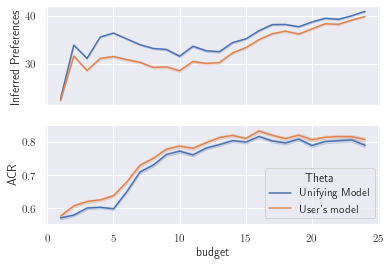

In [84]:
s=[]
EXP = "THETA_VS_NOTHETA_1"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])

df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "Ordinal"
df.loc[df["model"] == "CARD","model"] = "MS"

df.loc[df["real theta"] == True,"real theta"] = "User's model"
df.loc[df["real theta"] == False,"real theta"] = "Unifying Model"

df["Theta"] = df["real theta"]

df = df[df.evaluable > 0]
df = df[(df["model"] == "Ordinal") ]


df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "Theta", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "Theta", ax = ax1)
s2.get_legend().remove()

plt.savefig("THETA_ORD_COMP.png",bbox_inches="tight")

[5]
[ 3  6  9 12 15 18]
[0.1 0.3]
[0.1 0.3 0.5 0.7 0.9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(409024, 18)


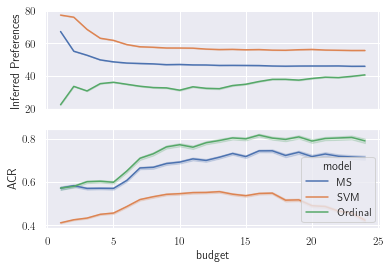

In [69]:
s=[]
EXP = "THETA_VS_NOTHETA_1"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "Ordinal"
df.loc[df["model"] == "CARD","model"] = "MS"

df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal") | (df["model"] == "MS")]


df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
df = df[(df["real theta"] == False)]

df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()

plt.savefig("THETA_ORD_CARD.png",bbox_inches="tight")

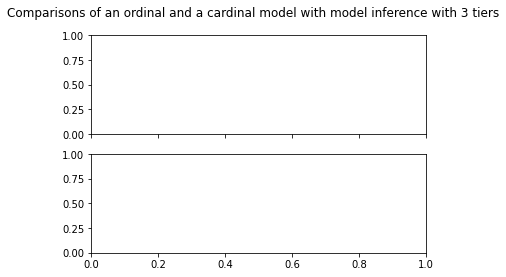

In [102]:
df["evaluable"] = (df["correct"] + df["wrong"])
df = df[(df["model"] == "CLF_COMP") |  (df["model"] == "ORD-UNION")]
df.loc[df["model"] == "CLF_COMP","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "Ordinal Model"

df = df[df.evaluable > 0]


df["ACR"] = (df["correct"] ) / (df["total"] )
df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["Predicted preferences"] = df["n_pref_output"]
np.unique(df.n_tiers)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Comparisons of an ordinal and a cardinal model with model inference with 3 tiers')
sns.lineplot(data=df, x= "budget", y="Predicted preferences", hue = "model", ax = ax1)
sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
plt.savefig("Exp1.png")

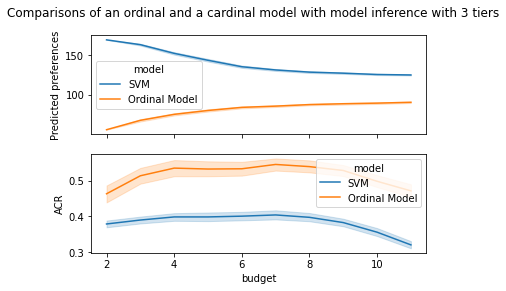

In [294]:
df = pd.read_csv("EXP5_4")
df["evaluable"] = (df["correct"] + df["wrong"])
df = df[(df["model"] == "CLF_COMP") |  (df["model"] == "ORD-UNION")]
df.loc[df["model"] == "CLF_COMP","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "Ordinal Model"

df = df[df.evaluable > 0]
df = df[df.budget < 12 ]
#df = df[df.model == "SVM" ]

#df = df[df.n_tiers == 3 ]

df["ACR"] = (df["correct"] ) / (df["total"] )
df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["Predicted preferences"] = df["n_pref_output"]
np.unique(df.n_tiers)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Comparisons of an ordinal and a cardinal model with model inference with 3 tiers')
sns.lineplot(data=df, x= "budget", y="Predicted preferences", hue = "model", ax = ax1)
sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
plt.savefig("Exp1.png")

In [277]:
df = pd.read_csv("EXP6_5_2")
df["evaluable"] = (df["correct"] + df["wrong"])
print(np.unique(df.model))
#df = df[(df["model"] == "ORD-UNION") |  (df["model"] == "CLF_UNION")]
df.loc[df["model"] == "CLF_COMP","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "Ordinal Model"

df = df[df.evaluable > 0]
df = df[df.budget < 25]

df["ACR"] = (df["correct"] ) / (df["total"] )
df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["Predicted preferences"] = df["n_pref_output"]
df

['CLF' 'ORD']


,Unnamed: 0,budget,model,correct,wrong,total,n_pref_input,n_pref_output,theta_size,theta_additivity,n_tiers,alpha,p,n_items,evaluable,ACR,RCR,Predicted preferences
0,0,2,CLF,274,112,616,1,617,8,2,3,0.1,0.100,5,386,0.444805,0.709845,617
1,1,2,ORD,1,0,1,1,2,8,2,3,0.1,0.100,5,1,1.000000,1.000000,2
2,2,3,CLF,246,84,522,3,525,8,2,3,0.1,0.100,5,330,0.471264,0.745455,525
3,3,3,ORD,4,0,4,3,7,8,2,3,0.1,0.100,5,4,1.000000,1.000000,7
4,4,4,CLF,241,82,510,5,515,8,2,3,0.1,0.100,5,323,0.472549,0.746130,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,367,13,ORD,105,14,119,56,175,8,5,3,0.1,0.775,5,119,0.882353,0.882353,175
368,368,14,CLF,215,30,600,65,665,8,5,3,0.1,0.775,5,245,0.358333,0.877551,665
369,369,14,ORD,107,15,122,65,187,8,5,3,0.1,0.775,5,122,0.877049,0.877049,187
370,370,15,CLF,206,30,591,74,665,8,5,3,0.1,0.775,5,236,0.348562,0.872881,665


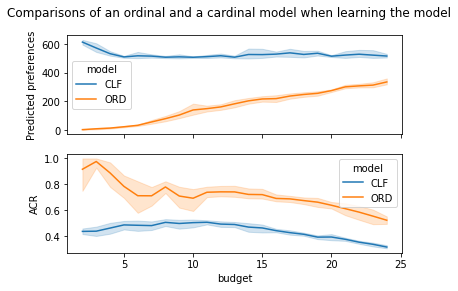

In [282]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Comparisons of an ordinal and a cardinal model when learning the model')
sns.lineplot(data=df, x= "budget", y="Predicted preferences", hue = "model", ax = ax1)
sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
plt.savefig("Exp2.png")